In [1]:
from IPython.display import Image

### Computational Graph
연산의 과정을 그래프로 표현, Pytorch에서는 TF와는 다르게, 실행 시점에서 그래프가 그려진다.

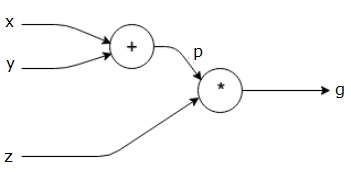

In [72]:
Image("../images/computational_graph_equation2.jpg")

* Define and Run,TF : 그래프를 먼저 정의 -> 실행시점에 데이터 Feed
  * TF는 production 과 scalability의 장점이 있다
  
  
* Define by Run(Dynamnic Computational Graph, DCG), Torch : 실행을 하면서 그래프를 생성하는 방식

DCG 방식으로 인해 실행중간에 그래프를 통해서 과정을 확인 할 수 있다는 점으로 디버그가 쉬워졌다.

* AutoGrad : 자동미분

## PyTorch Operation

### Tensor
다차원 Arrays를 표현하는 PyTorch 클래스, 사실상 numpy의 ndarray와 동일


In [3]:
import numpy as np
n_array = np.arange(10).reshape(2,5)
print(n_array)
print("ndim :", n_array.ndim , "shape :", n_array.shape)

[[0 1 2 3 4]
 [5 6 7 8 9]]
ndim : 2 shape : (2, 5)


In [4]:
import torch
t_array = torch.FloatTensor(n_array)
print(t_array)
print("ndim :", t_array.ndim, "shape :", t_array.shape)

tensor([[0., 1., 2., 3., 4.],
        [5., 6., 7., 8., 9.]])
ndim : 2 shape : torch.Size([2, 5])


Tensor 생성은 list나 ndarray로 사용 가능

In [10]:
# data to tensor
data = [[3, 5], [10, 5]]
x_data = torch.tensor(data)
x_data

tensor([[ 3,  5],
        [10,  5]])

In [7]:
data = [[3, 5, 20], [10, 5, 50], [1, 5, 10]]
x_data = torch.tensor(data)

In [12]:
x_data[1:]

tensor([[10,  5, 50],
        [ 1,  5, 10]])

In [13]:
x_data[:2, 1:]

tensor([[ 5, 20],
        [ 5, 50]])

In [14]:
x_data.flatten()

tensor([ 3,  5, 20, 10,  5, 50,  1,  5, 10])

In [15]:
torch.ones_like(x_data)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]])

In [16]:
x_data.numpy()

array([[ 3,  5, 20],
       [10,  5, 50],
       [ 1,  5, 10]], dtype=int64)

In [17]:
x_data.shape

torch.Size([3, 3])

In [18]:
x_data.dtype

torch.int64

pytorch의 tensor는 GPU에 올려서 사용 가능

In [19]:
x_data.device

device(type='cpu')

In [9]:
# torch, torchversion의 버전들을 확인하자
if torch.cuda.is_available():
    x_data_cuda = x_data.to('cuda')
x_data_cuda.device

device(type='cuda', index=0)

### Tensor handling
view, squeeze, unsqueeze 등으로 tensor 조정가능

* view : reshape 와 동일하게 tensor의 shape을 변환
* squeeze : 차원의 개수가 1인 차원을 삭제(압축)
* unsqueeze : 차원의 개수가 1인 차원을 추가

#### view

In [10]:
tensor_ex = torch.rand(size=(2,3,2))
tensor_ex

tensor([[[0.2973, 0.7681],
         [0.7729, 0.5307],
         [0.1061, 0.2057]],

        [[0.6637, 0.8607],
         [0.5544, 0.1981],
         [0.2562, 0.0809]]])

In [11]:
tensor_ex.view([-1,6])

tensor([[0.2973, 0.7681, 0.7729, 0.5307, 0.1061, 0.2057],
        [0.6637, 0.8607, 0.5544, 0.1981, 0.2562, 0.0809]])

In [12]:
tensor_ex.reshape([-1,6]) # reshape도 같은 역할

tensor([[0.2973, 0.7681, 0.7729, 0.5307, 0.1061, 0.2057],
        [0.6637, 0.8607, 0.5544, 0.1981, 0.2562, 0.0809]])

In [13]:
a = torch.zeros(3,2)
b = a.view(2,3) # copy가 아닌 기존의 메모리 주소를 그대로 사용
a.fill_(1)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [14]:
b

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [15]:
a = torch.zeros(3,2)
b = a.t().reshape(6) # 메모리 구조를 바꾸는 경우 copy
a.fill_(1)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [16]:
b

tensor([0., 0., 0., 0., 0., 0.])

#### squeeze, unsqueeze

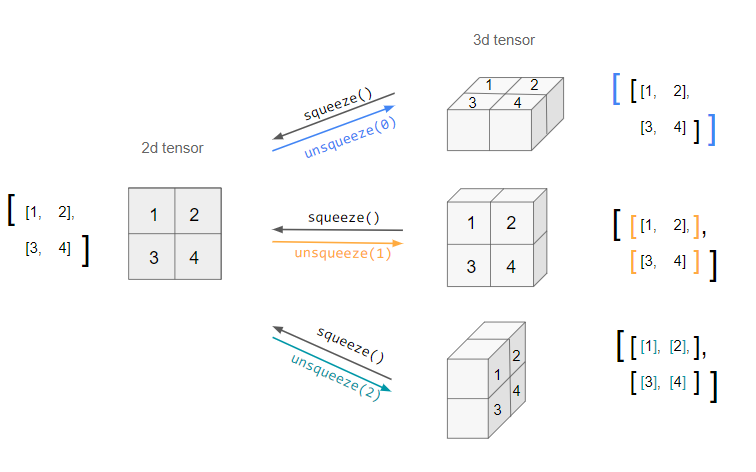

In [73]:
Image("../images/9AJJA.png")

2 by 2 행렬을 기준으로

* squeeze : 2,2,1 로 표현되는 2 by 2 행렬을 2,2 로 바꿔줌

unsqueeze의 매개변수는 axis와 동일하다.
* unsqueeze(0) : 1,2,2 로 index 상의 맨 끝에 붙여준다.
* unsqueeze(1) : 2,1,2
* unsqueeze(2) : 2,2,1

In [19]:
a = torch.tensor([[1,2], [3,4]])
a.unsqueeze(0).shape

torch.Size([1, 2, 2])

### Tensor operations
numpy와 동일

In [21]:
n1 = np.arange(10).reshape(2,5)
t1 = torch.FloatTensor(n1)

In [22]:
t1 + t1

tensor([[ 0.,  2.,  4.,  6.,  8.],
        [10., 12., 14., 16., 18.]])

In [23]:
t1 - t1

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [24]:
t1 + 10

tensor([[10., 11., 12., 13., 14.],
        [15., 16., 17., 18., 19.]])

**행렬곱셈 연산 함수는 dot이 아닌 mm 사용**
다만 mm은 벡터간의 연산이 안되니 그때는 dot을 쓰자.

* 벡터간의 연산은 dot이 가능하나 행렬간의 연산은 mm을 쓰자.

In [25]:
n2 = np.arange(10).reshape(5,2)
t2 = torch.FloatTensor(n2)

In [27]:
t1

tensor([[0., 1., 2., 3., 4.],
        [5., 6., 7., 8., 9.]])

In [28]:
t2

tensor([[0., 1.],
        [2., 3.],
        [4., 5.],
        [6., 7.],
        [8., 9.]])

In [26]:
t1.mm(t2)

tensor([[ 60.,  70.],
        [160., 195.]])

In [31]:
a = torch.rand(10)
b = torch.rand(10)
a.dot(b)

tensor(3.0840)

In [33]:
t1.matmul(t2)

tensor([[ 60.,  70.],
        [160., 195.]])

In [32]:
a.mm(b) # mm은 벡터간의 연산 x

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [29]:
t1.dot(t2) # 행렬간 연산에서는 안됨

RuntimeError: 1D tensors expected, got 2D, 2D tensors at C:\w\b\windows\pytorch\aten\src\TH/generic/THTensorEvenMoreMath.cpp:431

#### mm & matmul
mm은 broadcasting 지원을 안하지만 matmul은 한다,

In [34]:
a = torch.rand(5, 2, 3)
b = torch.rand(3)
a.mm(b)

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [50]:
a = torch.rand(5, 2, 3) # batch, 2 by 3
b = torch.rand(3) # 3 by 1
print(a.matmul(b)) # 5 by 2 by 1
'''
for i in range(a.shape[0]): # unsqueeze를 사용하면 된다.
    a[i].mm(torch.unsqueeze(b,1))''' 

tensor([[1.6591, 1.7544],
        [0.9126, 0.6738],
        [1.8391, 1.5166],
        [1.3018, 1.6802],
        [1.9692, 1.1969]])


'\nfor i in range(a.shape[0]): # unsqueeze를 사용하면 된다.\n    a[i].mm(torch.unsqueeze(b,1))'

In [53]:
a[0].mm(torch.unsqueeze(b,1)).squeeze()

tensor([1.6591, 1.7544])

### Tensor operations for ML/DL formula

nn.functional 모듈을 통해 다양한 수식 변환을 지원

* nn.functional.softmax
* nn.functional.argmax
* nn.functional.one_hot

... 필요할 때 마다 검색해서 사용!

In [54]:
import torch
import torch.nn.functional as F

tensor = torch.FloatTensor([0.5, 0.7, 0.1])
h_tensor = F.softmax(tensor, dim=0)
h_tensor

tensor([0.3458, 0.4224, 0.2318])

In [56]:
y = torch.randint(5, (10,5))
y_label = y.argmax(dim=1)
torch.nn.functional.one_hot(y_label)

tensor([[0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1],
        [0, 1, 0, 0, 0]])

### AutoGrad
backward 함수를 사용해 자동 미분을 할 수 있다.

$$y = w^2$$
$$z = 10*y + 25$$
$$z = 10*w^2 + 25$$

In [58]:
w = torch.tensor(2.0, requires_grad=True)
y = w**2
z = 10*y + 25
z.backward() 

tensor(40.)

In [59]:
w.grad

tensor(40.)

#### 벡터 편미분
$$ Q = 3a^3 - b^2$$

a, b가 신경망의 매개변수이고 Q가 오차(error)라고 가정해보자.

Q의 `backward()`를 호출할 때, 각각 미분을 계산하여 각 텐서의 `.grad` 속성에 저장한다.(a.grad, b.grad)

Q는 벡터이므로 `Q.backward()` 에 gradient 인자(argument)를 명시적으로 전달해야 각각 인자에 대한 편미분이 가능하다.

In [69]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)
Q = 3*a**3 - b**2
external_grad = torch.tensor([1.,1.])
Q.backward(gradient=external_grad)# Q는 벡터라는 것을 명시적으로

In [70]:
a.grad

tensor([36., 81.])

In [71]:
b.grad

tensor([-12.,  -8.])

\begin{align}\frac{\partial Q}{\partial a} = 9a^2\end{align}

\begin{align}\frac{\partial Q}{\partial b} = -2b\end{align}

### autograd 를 사용한 벡터 미적분(calculus)

수학적으로 벡터 함수 $\vec{y} = f(\vec{x})$ 에서 $\vec{x}$ 에 대한 $\vec{y}$의 변화도(gradient, 미분)은  야코비안 행렬(Jacobian Matrix) $J$ : 이다.

\begin{align}J
     =
      \left(\begin{array}{cc}
      \frac{\partial \bf{y}}{\partial x_{1}} &
      ... &
      \frac{\partial \bf{y}}{\partial x_{n}}
      \end{array}\right)
     =
     \left(\begin

출처 : 부스트캠프 AI Tech, pytorch 튜토리얼